In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('pentatonicTV.csv')

display(df.head())
print(df.info())

,previously_shoped,member,promotion,shop_competitor,prize_won,require_financing,got_a_TV,did_a_purchase,promotions_used,LT_clients,...,female,email,live_with_parents,work,family,state,education,age,monthly_spent_electronics,Diff_time
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,14.0,...,1,1,1,1,4,5,1,40.0,5916.666667,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,12.0,...,0,1,0,3,0,1,3,57.0,5583.333333,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,6.0,...,1,1,0,3,2,6,2,46.0,2666.666667,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,7.0,...,1,1,0,2,4,5,5,72.0,5833.333333,0.0
4,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,9.0,...,1,1,0,2,1,6,1,79.0,4916.666667,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20490 entries, 0 to 20489
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   previously_shoped          20490 non-null  float64
 1   member                     20490 non-null  float64
 2   promotion                  20490 non-null  float64
 3   shop_competitor            20490 non-null  float64
 4   prize_won                  20490 non-null  float64
 5   require_financing          20490 non-null  float64
 6   got_a_TV                   20490 non-null  float64
 7   did_a_purchase             20490 non-null  float64
 8   promotions_used            20490 non-null  float64
 9   LT_clients                 20490 non-null  float64
 10  prize_amount               20490 non-null  float64
 11  amount_financing           20490 non-null  float64
 12  amount_purchase            20490 non-null  float64
 13  nb_electronics             20490 non-null  flo

0.0    18428
1.0     2062
Name: got_a_TV, dtype: int64

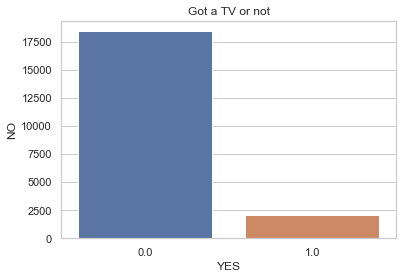

In [5]:
## Create X (features) and y(response)
X_features = df.drop('got_a_TV', axis=1)
# display(X_features.head())
y_target = df.got_a_TV
# display(y_target.head())


## is_cancelled

plt.figure(figsize=(6, 4))
sns.set(style="whitegrid")
ax = sns.countplot(x="got_a_TV", data=df)
plt.title('Got a TV or not')
plt.xlabel('YES')
plt.ylabel('NO')

# checking frequncy of target classes
y_target.value_counts()

In [7]:
num_int_type = X_features.select_dtypes(include='int64').columns.tolist()
num_float_type = X_features.select_dtypes(include='float64').columns.tolist()

num_type = num_int_type + num_float_type
print("Numerical Types columns name: \n", num_type)


Numerical Types columns name: 
 ['female', 'email', 'live_with_parents', 'work', 'family', 'state', 'education', 'previously_shoped', 'member', 'promotion', 'shop_competitor', 'prize_won', 'require_financing', 'did_a_purchase', 'promotions_used', 'LT_clients', 'prize_amount', 'amount_financing', 'amount_purchase', 'nb_electronics', 'age', 'monthly_spent_electronics', 'Diff_time']


In [9]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer


# Preprocessing for numerical features:
num_transformer = make_pipeline(StandardScaler(), SimpleImputer(strategy='constant'))

## Transforming both numerical based preprocessing above
column_transformer = make_column_transformer((num_transformer, num_type))

#check
column_transformer.fit_transform(X_features)

array([[ 0.82751451,  0.57994258,  1.54076289, ..., -0.8511569 ,
         0.5616488 , -1.37761193],
       [-1.00812176,  0.57994258, -0.64902913, ...,  0.15606815,
         0.3618656 , -1.37761193],
       [ 0.82751451,  0.57994258, -0.64902913, ..., -0.49566571,
        -1.38623737, -1.37761193],
       ...,
       [-1.00812176,  0.57994258, -0.64902913, ...,  0.74855348,
         0.16208241,  0.24846361],
       [ 0.82751451,  0.57994258,  1.54076289, ..., -0.49566571,
         0.4617572 ,  1.52381697],
       [ 0.82751451,  0.57994258,  1.54076289, ..., -1.73988489,
         0.4617572 ,  1.20497863]])

In [10]:
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.naive_bayes import GaussianNB # Naives Bayes
from sklearn.neural_network import MLPClassifier # Neural Network


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

In [11]:


""" Training Model """
def train_model(model_steps, X_features, y_target, num_procs,  mean_score, std_dev):
    
    # split1 = KFold(n_splits=5, shuffle=False, random_state=None)
    split2 = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    
    # get cross validation score for each model:
    cv_results = cross_val_score(model_steps, 
                                 X_features, y_target, 
                                 cv=split2,
                                 scoring="accuracy",
                                 n_jobs=-1)
    mean_score[model_steps] = round(np.mean(cv_results), 4)
    std_dev[model_steps] = round(np.std(cv_results), 4)
    
""" Summary of the Model """
def print_summary(model, mean_score, std_dev):
    print('\nModel:\n', model)
    print('Cross validation accuarcy score: ', mean_score[model_steps])
    print('Standard deviation during CV: ', std_dev[model_steps] )

In [12]:

"""
    Evaluating Models
    - Decision Trees
    - Logistic Regression
    - Naive Bayes
    - Neural Network

"""

# intialize the model list and dicts
models = []
mean_score = {}
std_dev = {}
# res = {}

# define number of processes to run in parallel
num_procs = 2

# shared model parameters
verbose_lvl = 0


# create models  
DT_model = DecisionTreeClassifier(random_state=42)
Logreg_model = LogisticRegression(random_state=42,n_jobs=-1)
GNM_model = GaussianNB()
MLP_model = MLPClassifier(hidden_layer_sizes=(13,13,13), max_iter=500)


# list all models
models.extend([DT_model, Logreg_model, GNM_model, MLP_model])


# parallel cross-validate models, using mean accuracy as evaluation metric, and print summaries
print("Beginning cross validation")
for model in models:
    # pack preprocessing of data and the model in a pipeline:
    model_steps = make_pipeline(column_transformer, model)
    
    # Calling train_model()
    train_model(model_steps, X_features, y_target, num_procs, mean_score, std_dev)
    
    # Calling print_summary()
    print_summary(model, mean_score, std_dev)

Beginning cross validation

Model:
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
Cross validation accuarcy score:  0.8054
Standard deviation during CV:  0.0078

Model:
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)
Cross validation accuarcy score:  0.8994
Standard deviation during CV:  0.0002

Model:
 GaussianNB(priors=None, var_smoothing=1e-09)
Cross validatio